In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

random.seed(10)

In [7]:
path = os.path.dirname(os.path.abspath(__name__)) + "/../../data/x_train.txt"
x_train = pd.read_csv(path, sep=" ", header=None)
path = os.path.dirname(os.path.abspath(__name__)) + "/../../data/y_train.txt"
y_train = pd.read_csv(path, sep=" ", header=None)
y = y_train.copy()
y.columns = ["y"]
train = pd.concat([x_train, y], axis=1)
train_important = train.iloc[
    :, [0, 2, 3, 4, 5, 6, 8, 9, 100, 101, 102, 103, 104, 105, -1]
]

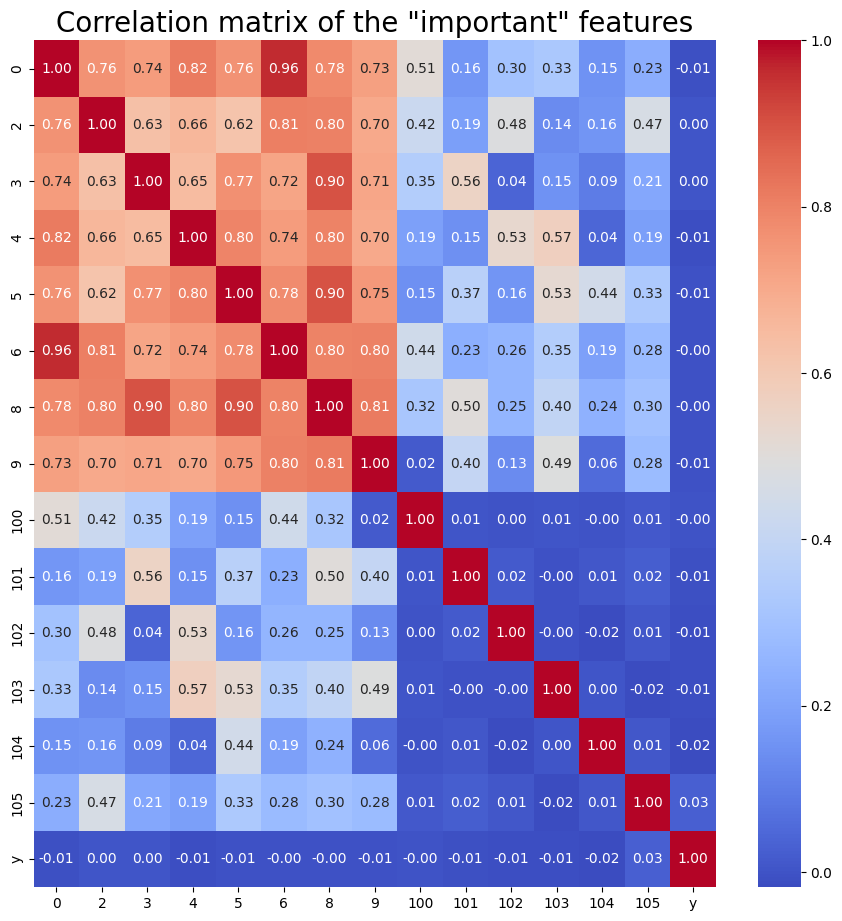

In [11]:
plt.figure(figsize=(11, 11))
sns.heatmap(train_important.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation matrix of the "important" features', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

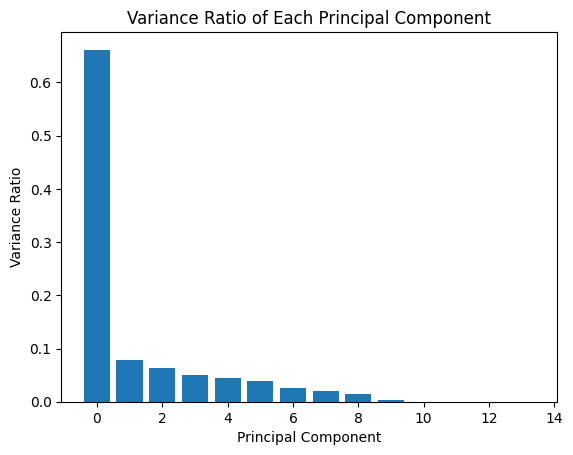

In [12]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=14)
train_important_pca = pca.fit_transform(train_important)

# plot importance of each component
plt.bar(range(14), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.title("Variance Ratio of Each Principal Component")
plt.show()

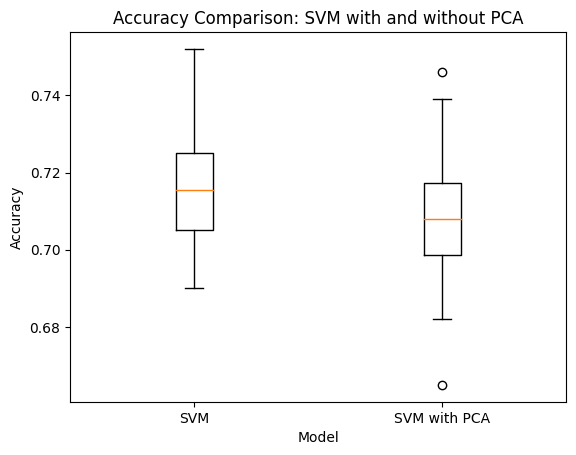

CPU times: user 1min 5s, sys: 40.6 s, total: 1min 46s
Wall time: 59.5 s


In [13]:
%%time

random.seed(42)
random_states = [random.randint(0, 10000) for i in range(40)]
random_states

accuracies_svm = []
accuracies_svm_pca = []

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(
        train_important, train["y"], test_size=0.2, random_state=random_state
    )


    svm = SVC()
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    accuracies_svm.append(accuracy)

    # PCA
    from sklearn.decomposition import PCA

    pca = PCA(n_components=8)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    svm_pca = SVC()
    svm_pca.fit(X_train_pca, y_train)
    accuracy_pca = svm_pca.score(X_test_pca, y_test)
    accuracies_svm_pca.append(accuracy_pca)


plt.boxplot([accuracies_svm, accuracies_svm_pca])
plt.xticks([1, 2], ['SVM', 'SVM with PCA'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: SVM with and without PCA')
plt.show()

Svm performs slightly worse with pca